In [1]:
import numpy as np
np.random.seed(123)

## Import dataset

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

In [3]:
boston.DESCR.split('\n')

['Boston House Prices dataset',
 '===========================',
 '',
 'Notes',
 '------',
 'Data Set Characteristics:  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive',
 '    ',
 '    :Median Value (attribute 14) is usually the target',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial high

In [4]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
len(boston.target)

506

## Train-test split

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle

In [8]:
X, y = shuffle(boston.data, boston.target, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

## Models

In [9]:
from  sklearn.linear_model  import Ridge, Lasso, ElasticNet, LinearRegression

In [10]:
np.random.seed(123)

In [11]:
lin_reg = LinearRegression()

In [17]:
ridge_reg = Ridge(alpha=.1,  # regularization (L2) strength
                  max_iter=1000,
                  tol=0.0001,  # when to stop
                  random_state=40) 

lasso_reg = Lasso(alpha=.1,  # multiples L1 penalty, a 0 is linreg
                  max_iter=1000,
                  tol=0.0001,  # when to stop
                  random_state=40) 

en_reg = ElasticNet(alpha=.1,  # multiplies penalty, 0 is linreg
                    l1_ratio=0.5,  # ratio of L1 in penalty, 0 would be pure L2 penalty, mix of ridge and lasso
                    max_iter=1000,
                    tol=0.0001,  # when to stop
                    random_state=40) 

lin_model = lin_reg.fit(X_train, y_train)
ridge_model = ridge_reg.fit(X_train, y_train)
lasso_model = lasso_reg.fit(X_train, y_train)
en_model = en_reg.fit(X_train, y_train)


print("Linear R2:\n")
print(lin_model.score(X_test, y_test))  # R2
print()
print("Ridge R2:\n")
print(ridge_model.score(X_test, y_test))  # R2
print()
print("Lasso R2:\n")
print(lasso_model.score(X_test, y_test))  # R2
print()
print("Elastic Net R2:\n")
print(en_model.score(X_test, y_test))  # R2

Linear R2:

0.6706518809036627

Ridge R2:

0.6703716696946744

Lasso R2:

0.6512550578607512

Elastic Net R2:

0.6500143920521249


## Compare coefficients

In [18]:
for model in (lin_model, ridge_model, lasso_model, en_model):
    print(model)
    print()
    print (model.coef_)
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[-1.00501016e-01  5.93297330e-02  2.74712171e-02  3.01179684e+00
 -1.71048672e+01  3.65510434e+00 -1.07747856e-03 -1.51754033e+00
  2.92773885e-01 -1.20719595e-02 -9.59227512e-01  1.13651787e-02
 -5.23968116e-01]

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=40, solver='auto', tol=0.0001)

[-1.00066609e-01  5.94498829e-02  2.14896383e-02  2.97368405e+00
 -1.58693561e+01  3.66949350e+00 -2.22687012e-03 -1.49904466e+00
  2.89825481e-01 -1.21221324e-02 -9.44575905e-01  1.14438778e-02
 -5.24961714e-01]

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=40,
   selection='cyclic', tol=0.0001, warm_start=False)

[-0.09312074  0.06196784 -0.0311636   0.69313225 -0.          3.68072377
 -0.01221933 -1.2098427   0.26136077 -0.01366093 -0.7735202   0.01249684
 -0.5594546 ]

ElasticNet(al

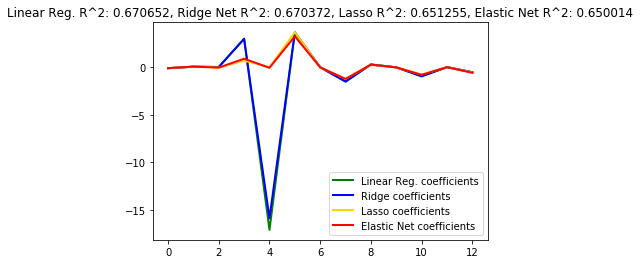

In [19]:
% matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

y_pred_lin = lin_reg.fit(X_train, y_train).predict(X_test)
y_pred_en = en_reg.fit(X_train, y_train).predict(X_test)
y_pred_lasso = lasso_reg.fit(X_train, y_train).predict(X_test)
y_pred_ridge = ridge_reg.fit(X_train, y_train).predict(X_test)

plt.plot(lin_model.coef_, color='green', linewidth=2, label='Linear Reg. coefficients')
plt.plot(ridge_model.coef_, color='blue', linewidth=2, label='Ridge coefficients')
plt.plot(lasso_model.coef_, color='gold', linewidth=2, label='Lasso coefficients')
plt.plot(en_model.coef_, color='red', linewidth=2, label='Elastic Net coefficients')

# plt.plot(coef, '--', color='navy', label='original coefficients')
plt.legend(loc='best')
plt.title("Linear Reg. R^2: %f, Ridge Net R^2: %f, Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score(y_test, y_pred_lin), r2_score(y_test, y_pred_ridge), r2_score(y_test, y_pred_lasso), r2_score(y_test, y_pred_en)))
plt.show()

## Grid search

In [16]:
from  sklearn.model_selection  import GridSearchCV

for m in [Ridge(), Lasso(), ElasticNet()]:

    param_grid = {'alpha': np.arange(.001, 1, .01)}

    model_r = GridSearchCV(m, param_grid)
    model_r.fit(X_train, y_train)
    
    print(model_r)

    best_index = np.argmax(model_r.cv_results_["mean_test_score"])

    print(model_r.cv_results_["params"][best_index])
    print(model_r.score(X_test, y_test))
    print("---"*10)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([0.001, 0.011, ..., 0.981, 0.991])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
{'alpha': 0.001}
0.6706494936519052
------------------------------
GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([0.001, 0.011, ..., 0.981, 0.991])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
{'alpha': 0.001}
0.6706292493573004
------------------